In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

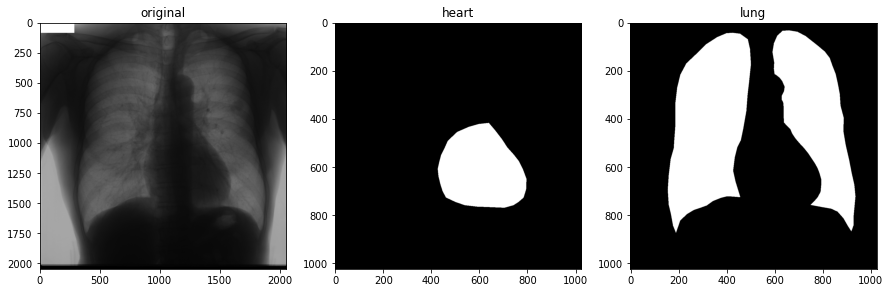

In [ ]:
original_img = cv2.imread("/content/drive/MyDrive/Cardiomegaly/Images/JPCLN001.png")
heart_segment = cv2.imread("/content/drive/MyDrive/Cardiomegaly/combined_heart/JPCLN001.png")
lung_segment = cv2.imread("/content/drive/MyDrive/Cardiomegaly/combined_lung/JPCLN001.png")

plt.figure(figsize=(15,12))
plt.subplot(131), plt.imshow(original_img,cmap='gray'), plt.title("original")
plt.subplot(132), plt.imshow(heart_segment,cmap='gray'), plt.title("heart")
plt.subplot(133), plt.imshow(lung_segment,cmap='gray'), plt.title("lung")
plt.show()

In [ ]:
original_img_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
heart_mask = cv2.cvtColor(heart_segment, cv2.COLOR_BGR2GRAY)
lung_mask = cv2.cvtColor(lung_segment, cv2.COLOR_BGR2GRAY)

original_img_gray = cv2.resize(original_img_gray, (2000, 2000))
heart_mask = cv2.resize(heart_mask, (2000, 2000))
lung_mask = cv2.resize(lung_mask, (2000, 2000))

In [ ]:
print(original_img_gray.shape)
print(heart_mask.shape)
print(lung_mask.shape)

(2000, 2000)
(2000, 2000)
(2000, 2000)


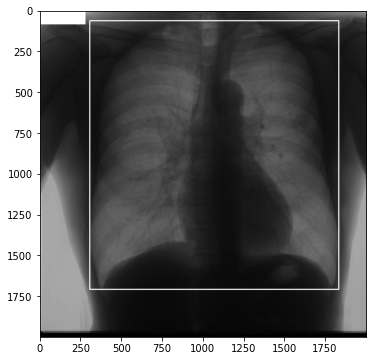

In [ ]:
x, y, w, h = cv2.boundingRect(lung_mask)
lung_box = cv2.rectangle(original_img_gray.copy(),(x,y),(x+w,y+h),(255,0,0),5)
plt.figure(figsize=(12,6))
plt.imshow(lung_box,cmap="gray")

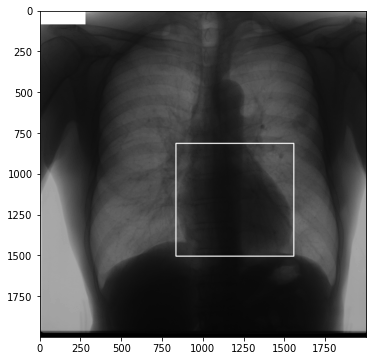

In [ ]:
x1, y1, w1, h1 = cv2.boundingRect(heart_mask)
plt.figure(figsize=(12,6))
heart_box = cv2.rectangle(original_img_gray.copy(),(x1,y1),(x1+w1,y1+h1),(255,0,0),5)
plt.imshow(heart_box,cmap="gray")

In [ ]:
def Cardiomegaly_detector(original_image, heart_mask, lung_mask,size):

    original_img_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    heart_mask_gray = cv2.cvtColor(heart_segment, cv2.COLOR_BGR2GRAY)
    lung_mask_gray = cv2.cvtColor(lung_segment, cv2.COLOR_BGR2GRAY)

    original_img_gray = cv2.resize(original_img_gray, (size, size))
    heart_mask = cv2.resize(heart_mask_gray, (size, size))
    lung_mask = cv2.resize(lung_mask_gray, (size, size))

    x, y, w, h = cv2.boundingRect(lung_mask)
    lung_box = cv2.rectangle(original_img_gray.copy(),(x,y),(x+w,y+h),(255,0,0),5)

    x1, y1, w1, h1 = cv2.boundingRect(heart_mask)
    final_img = cv2.rectangle(lung_box,(x1,y1),(x1+w1,y1+h1),(255,0,0),5)

    Cardiothoracic_Ratio = w1/w

    return final_img,Cardiothoracic_Ratio

In [ ]:
image, ratio = Cardiomegaly_detector(original_img, heart_segment, lung_segment,2000)

Cardiothoracic Ratio : 0.47340774786605383


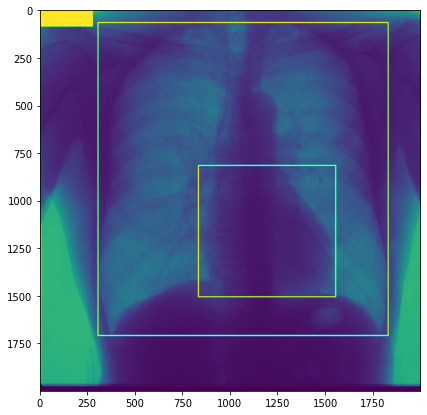

In [ ]:
print("Cardiothoracic Ratio :", ratio)
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.show()

# Testing With other Images

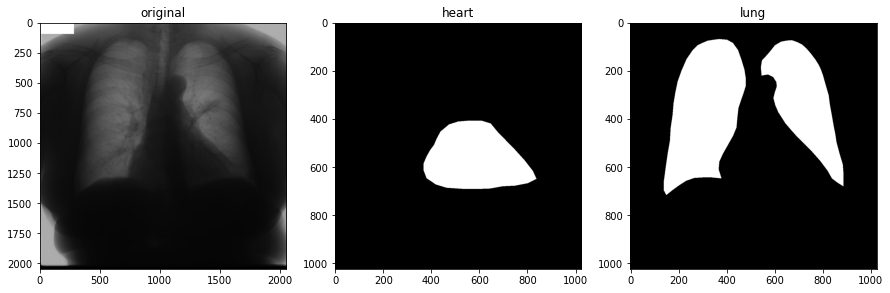

In [ ]:
original_img2 = cv2.imread("/content/drive/MyDrive/Cardiomegaly/Images/JPCLN005.png")
heart_segment2 = cv2.imread("/content/drive/MyDrive/Cardiomegaly/combined_heart/JPCLN005.png")
lung_segment2 = cv2.imread("/content/drive/MyDrive/Cardiomegaly/combined_lung/JPCLN005.png")

plt.figure(figsize=(15,12))
plt.subplot(131), plt.imshow(original_img2,cmap='gray'), plt.title("original")
plt.subplot(132), plt.imshow(heart_segment2,cmap='gray'), plt.title("heart")
plt.subplot(133), plt.imshow(lung_segment2,cmap='gray'), plt.title("lung")
plt.show()

Cardiothoracic Ratio : 0.6300617707618394


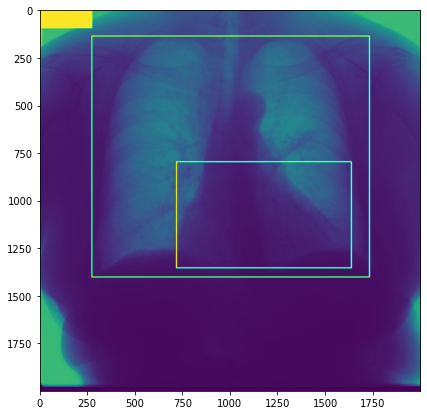

In [ ]:
image, ratio = Cardiomegaly_detector(original_img2, heart_segment2, lung_segment2,2000)
print("Cardiothoracic Ratio :", ratio)
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.show()

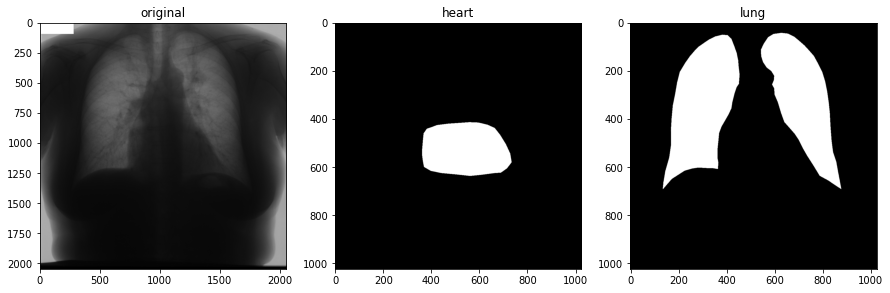

In [ ]:
original_img3 = cv2.imread("/content/drive/MyDrive/Cardiomegaly/Images/JPCLN003.png")
heart_segment3 = cv2.imread("/content/drive/MyDrive/Cardiomegaly/combined_heart/JPCLN003.png")
lung_segment3 = cv2.imread("/content/drive/MyDrive/Cardiomegaly/combined_lung/JPCLN003.png")

plt.figure(figsize=(15,12))
plt.subplot(131), plt.imshow(original_img3,cmap='gray'), plt.title("original")
plt.subplot(132), plt.imshow(heart_segment3,cmap='gray'), plt.title("heart")
plt.subplot(133), plt.imshow(lung_segment3,cmap='gray'), plt.title("lung")
plt.show()

Cardiothoracic Ratio : 0.6300617707618394


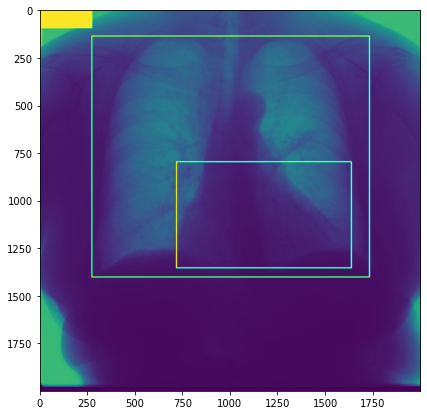

In [ ]:
image3, ratio3 = Cardiomegaly_detector(original_img3, heart_segment3, lung_segment3,2000)
print("Cardiothoracic Ratio :", ratio3)
plt.figure(figsize=(10,7))
plt.imshow(image3)
plt.show()